In [15]:
from PIL import Image as im
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pylab
from scipy.ndimage import interpolation as inter
import os
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 6)
%precision 3

'%.3f'

In [17]:
def open(path):
    orig = im.open(path)
    wd, ht = orig.size
    imgarr = np.asarray(orig.getdata()).reshape((ht, wd))
    imgarr //= 255
    imgarr = 1 - imgarr
    while imgarr.shape[-1] > 800:
        print(imgarr.shape, end="-> ")
        imgarr = imgarr[::2, ::2]
    
    print(imgarr.shape)
    return imgarr

MAX, BY = 6, .75
main_angles = np.arange(-MAX, MAX+BY, BY)
SUB_BY = 1/8

def find_scores(imgarr, angles, col='b'):
    scores = np.zeros_like(angles)

    for i, a in enumerate(angles):
        data = inter.rotate(imgarr, a, reshape=0, order=0)
        hist = np.sum(data, axis=1)
        scores[i] = np.sum((hist[1:] - hist[:-1]) ** 2)
    
    best = np.argmax(scores)
    markerline, stemlines, baseline = plt.stem(angles, scores)
    plt.setp(stemlines, 'color', col)
    
    return scores, best

print(main_angles)

def find_skew(path):
    imgarr = open(path)
    scores, best = find_scores(imgarr, main_angles)
    
    top_a, top_b = sorted(np.argpartition(-scores, 2)[:2])
    sub_min, sub_max = main_angles[top_a-1], main_angles[top_b+1]
    
    sub_angles = np.arange(sub_min, sub_max, SUB_BY)
    sub_angles = np.setdiff1d(sub_angles, main_angles)
    print(sub_angles)
    sub_scores, sub_best = find_scores(imgarr, sub_angles, 'y')
    
    hmm = "* " if scores[best] > sub_scores[sub_best] else " *"
    print(hmm[0], main_angles[best], scores[best])
    print(hmm[1], sub_angles[sub_best], sub_scores[sub_best])
    
    plt.show()

[-6.   -5.25 -4.5  -3.75 -3.   -2.25 -1.5  -0.75  0.    0.75  1.5   2.25
  3.    3.75  4.5   5.25  6.  ]


(3300, 2550)-> (1650, 1275)-> (825, 638)
[-0.625 -0.5   -0.375 -0.25  -0.125  0.125  0.25   0.375  0.5    0.625
  0.875  1.     1.125  1.25   1.375]
  0.0 130080.0
* 0.25 139314.0


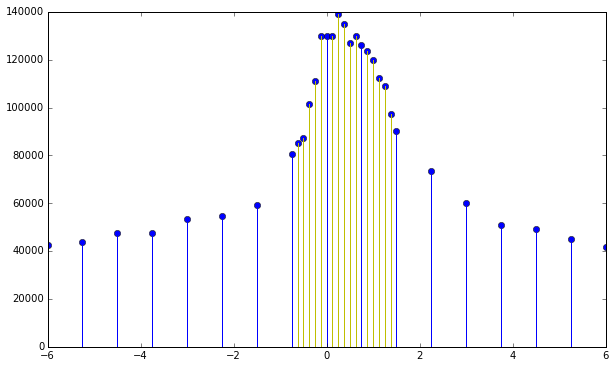

In [18]:
find_skew("/d/ocr/library/AmaraKosam.tif")

##############################adavidonga.tif
(1920, 1280)-> (960, 640)
[-1.375 -1.25  -1.125 -1.    -0.875 -0.625 -0.5   -0.375 -0.25  -0.125
  0.125  0.25   0.375  0.5    0.625]
* 0.0 1939240.0
  -0.125 1664716.0


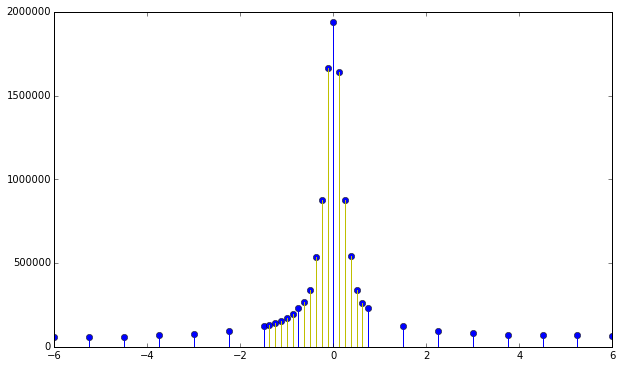

##############################amara6.tif
(4395, 2858)-> (2198, 1429)-> (1099, 715)
[-1.375 -1.25  -1.125 -1.    -0.875 -0.625 -0.5   -0.375 -0.25  -0.125
  0.125  0.25   0.375  0.5    0.625]
  0.0 744406.0
* -0.25 902588.0


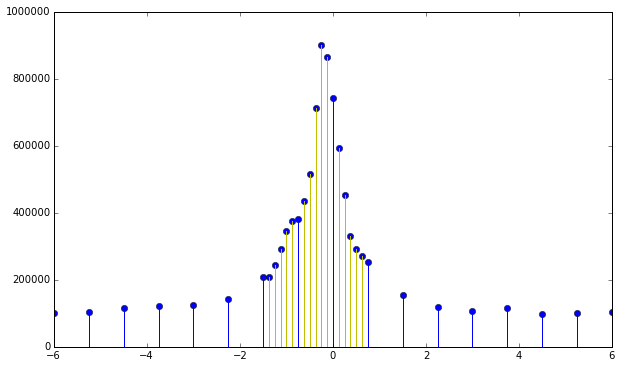

##############################AmaraKosam.tif
(3300, 2550)-> (1650, 1275)-> (825, 638)
[-0.625 -0.5   -0.375 -0.25  -0.125  0.125  0.25   0.375  0.5    0.625
  0.875  1.     1.125  1.25   1.375]
  0.0 130080.0
* 0.25 139314.0


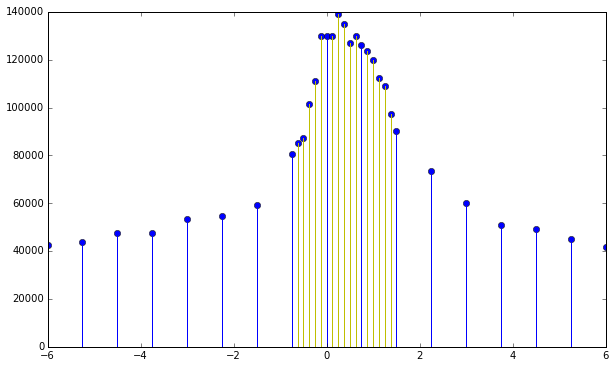

##############################amb283kandam.tif
(580, 1270)-> (290, 635)
[-1.375 -1.25  -1.125 -1.    -0.875 -0.625 -0.5   -0.375 -0.25  -0.125
  0.125  0.25   0.375  0.5    0.625]
  0.0 134484.0
* 0.125 135652.0


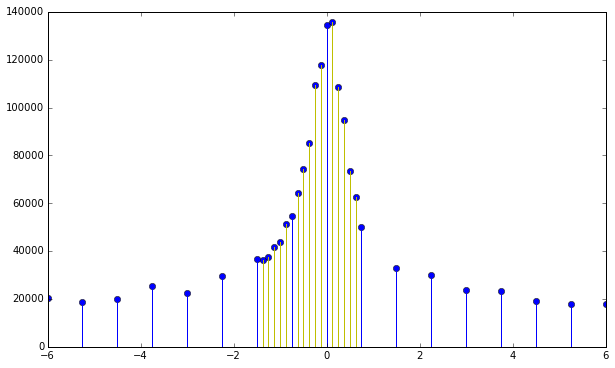

##############################amb283.tif
(4396, 2609)-> (2198, 1305)-> (1099, 653)
[-0.625 -0.5   -0.375 -0.25  -0.125  0.125  0.25   0.375  0.5    0.625
  0.875  1.     1.125  1.25   1.375]
* 0.0 540718.0
  -0.125 490182.0


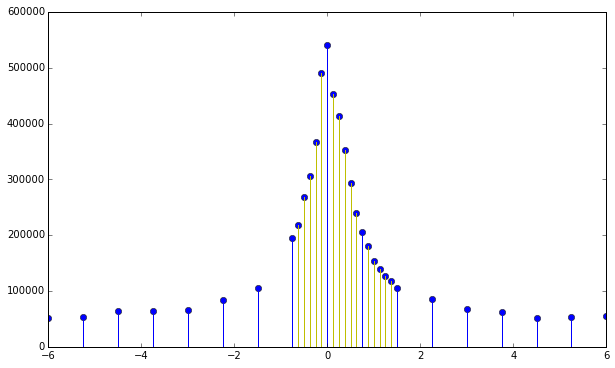

##############################amb4.tif
(571, 709)
[-0.625 -0.5   -0.375 -0.25  -0.125  0.125  0.25   0.375  0.5    0.625
  0.875  1.     1.125  1.25   1.375]
* 0.0 157100.0
  0.125 153814.0


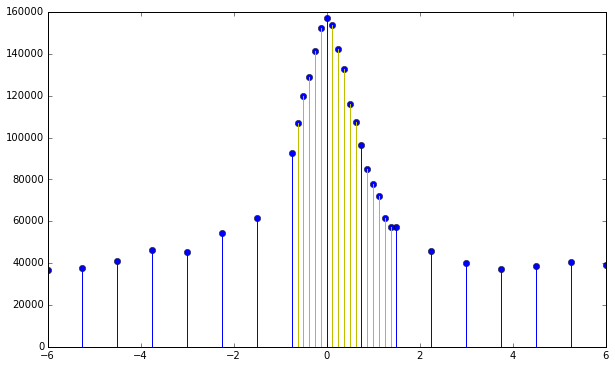

##############################amb.tif
(4344, 2626)-> (2172, 1313)-> (1086, 657)
[-1.375 -1.25  -1.125 -1.    -0.875 -0.625 -0.5   -0.375 -0.25  -0.125
  0.125  0.25   0.375  0.5    0.625]
* 0.0 695174.0
  0.125 663626.0


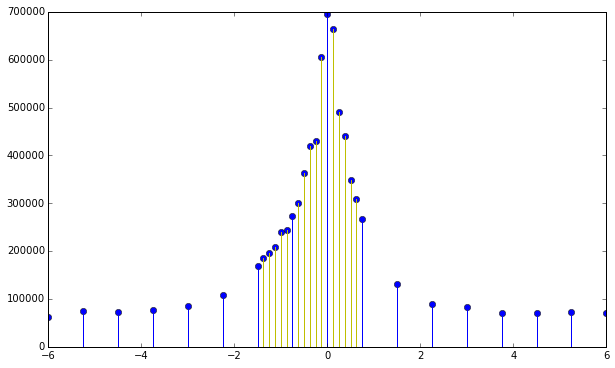

##############################ammanudi.tiff
(6485, 4952)-> (3243, 2476)-> (1622, 1238)-> (811, 619)
[-1.375 -1.25  -1.125 -1.    -0.875 -0.625 -0.5   -0.375 -0.25  -0.125
  0.125  0.25   0.375  0.5    0.625]
* 0.0 962982.0
  -0.125 862746.0


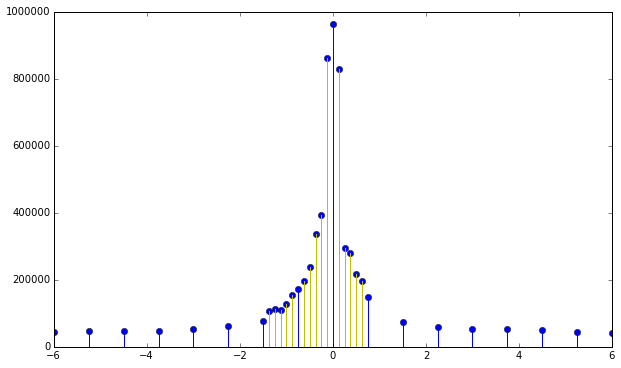

##############################bala45.tif
(5189, 3113)-> (2595, 1557)-> (1298, 779)
[-0.625 -0.5   -0.375 -0.25  -0.125  0.125  0.25   0.375  0.5    0.625
  0.875  1.     1.125  1.25   1.375]
* 0.0 4637878.0
  0.125 1340826.0


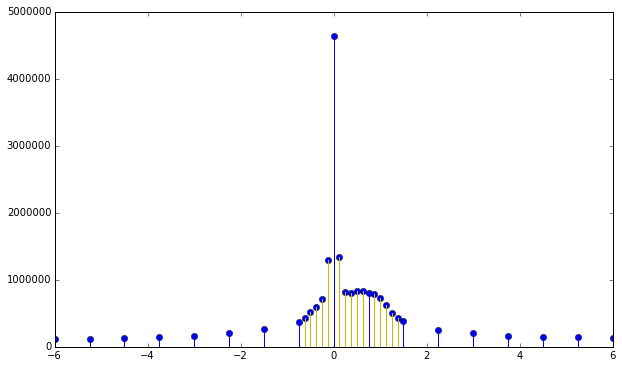

##############################dhatu_c30_part.tif
(456, 2514)-> (228, 1257)-> (114, 629)
[-1.375 -1.25  -1.125 -1.    -0.875 -0.625 -0.5   -0.375 -0.25  -0.125
  0.125  0.25   0.375  0.5    0.625]
* 0.0 471560.0
  -0.125 429180.0


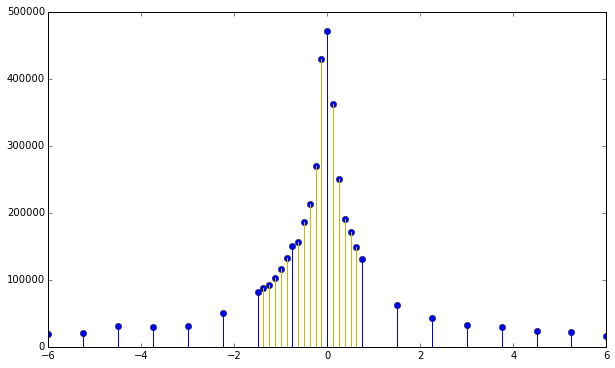

##############################dhatu_c30.tif
(3554, 2367)-> (1777, 1184)-> (889, 592)
[-1.375 -1.25  -1.125 -1.    -0.875 -0.625 -0.5   -0.375 -0.25  -0.125
  0.125  0.25   0.375  0.5    0.625]
  0.0 1400814.0
* -0.25 1441822.0


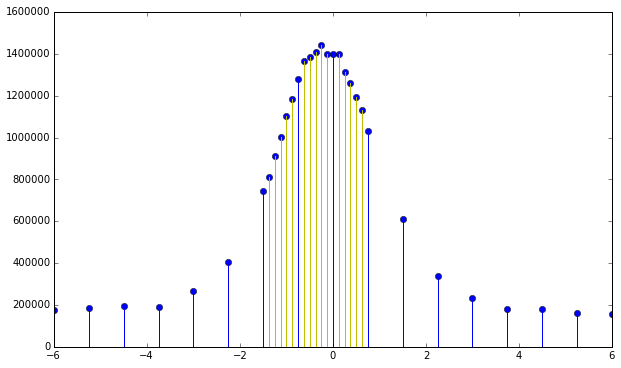

##############################dhatu.tif
(3554, 2367)-> (1777, 1184)-> (889, 592)
[-1.375 -1.25  -1.125 -1.    -0.875 -0.625 -0.5   -0.375 -0.25  -0.125
  0.125  0.25   0.375  0.5    0.625]
  0.0 374652.0
* -0.25 411700.0


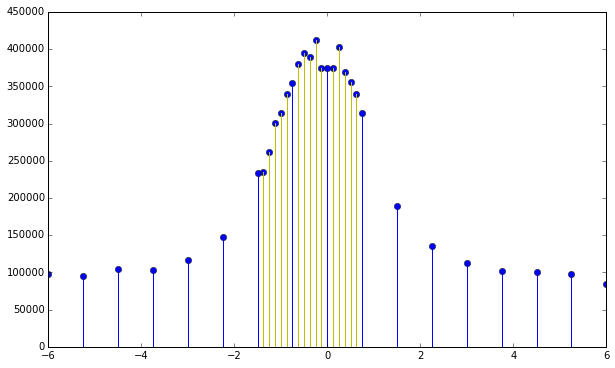

##############################four.tif
(238, 480)
[-1.375 -1.25  -1.125 -1.    -0.875 -0.625 -0.5   -0.375 -0.25  -0.125
  0.125  0.25   0.375  0.5    0.625]
  -0.75 27234.0
* -0.625 28082.0


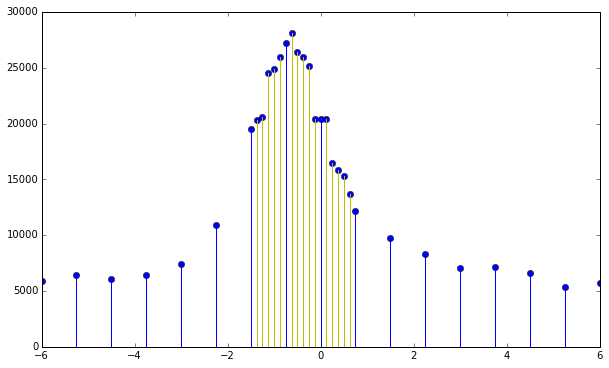

##############################love-language.tif
(3256, 2600)-> (1628, 1300)-> (814, 650)
[-0.625 -0.5   -0.375 -0.25  -0.125  0.125  0.25   0.375  0.5    0.625
  0.875  1.     1.125  1.25   1.375]
* 0.0 1926935.0
  0.125 1180451.0


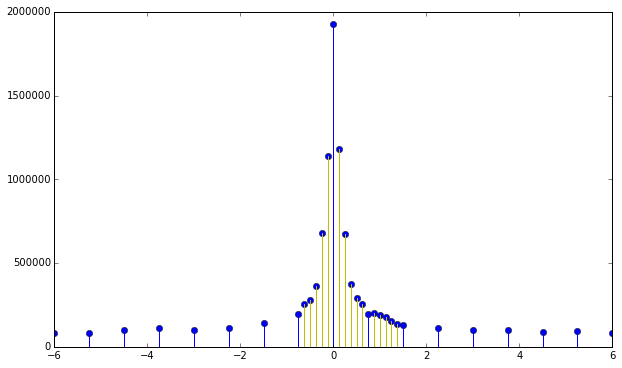

##############################nannayya9.tif
(4147, 2639)-> (2074, 1320)-> (1037, 660)
[-1.375 -1.25  -1.125 -1.    -0.875 -0.625 -0.5   -0.375 -0.25  -0.125
  0.125  0.25   0.375  0.5    0.625]
  -0.75 489548.0
* -0.5 586446.0


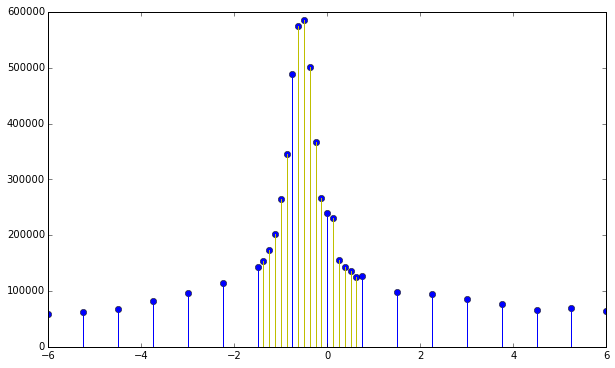

##############################papk12.tif
(3508, 2480)-> (1754, 1240)-> (877, 620)
[-0.625 -0.5   -0.375 -0.25  -0.125  0.125  0.25   0.375  0.5    0.625
  0.875  1.     1.125  1.25   1.375]
  0.0 462762.0
* 0.25 642046.0


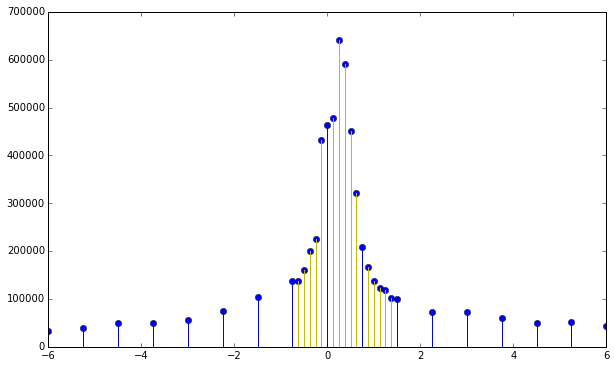

##############################praasa_clean.tif
(2908, 2002)-> (1454, 1001)-> (727, 501)
[ 0.125  0.25   0.375  0.5    0.625  0.875  1.     1.125  1.25   1.375
  1.625  1.75   1.875  2.     2.125]
  1.5 380578.0
* 1.375 407410.0


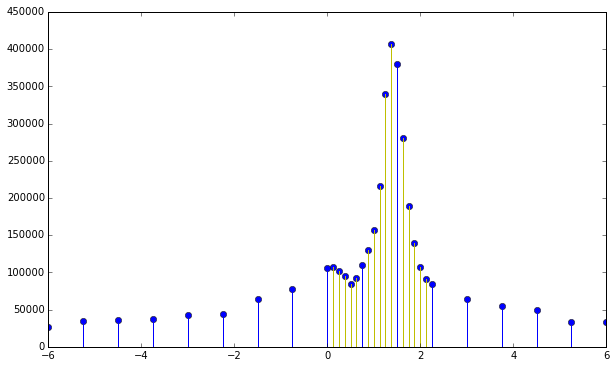

##############################praasa.tif
(2908, 2002)-> (1454, 1001)-> (727, 501)
[-0.625 -0.5   -0.375 -0.25  -0.125  0.125  0.25   0.375  0.5    0.625
  0.875  1.     1.125  1.25   1.375  1.625  1.75   1.875  2.     2.125]
  1.5 361296.0
* 1.375 385034.0


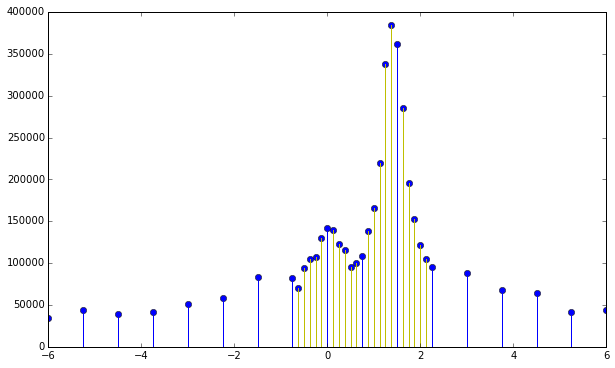

##############################prasaaskharapada022366mbp.tif
(3508, 2480)-> (1754, 1240)-> (877, 620)
[-1.375 -1.25  -1.125 -1.    -0.875 -0.625 -0.5   -0.375 -0.25  -0.125
  0.125  0.25   0.375  0.5    0.625]
  0.0 617646.0
* -0.125 639612.0


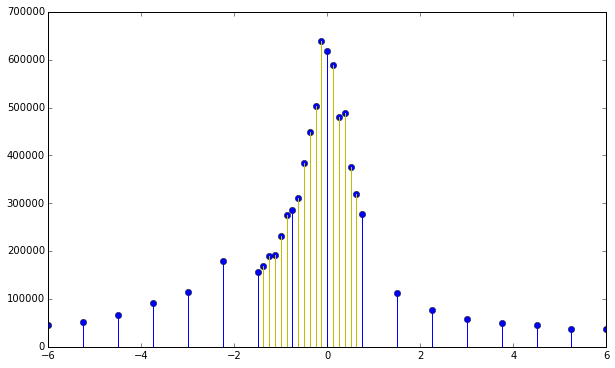

##############################prasaaskharapada.tif
(3300, 2550)-> (1650, 1275)-> (825, 638)
[-1.375 -1.25  -1.125 -1.    -0.875 -0.625 -0.5   -0.375 -0.25  -0.125
  0.125  0.25   0.375  0.5    0.625]
  0.0 444892.0
* -0.25 509416.0


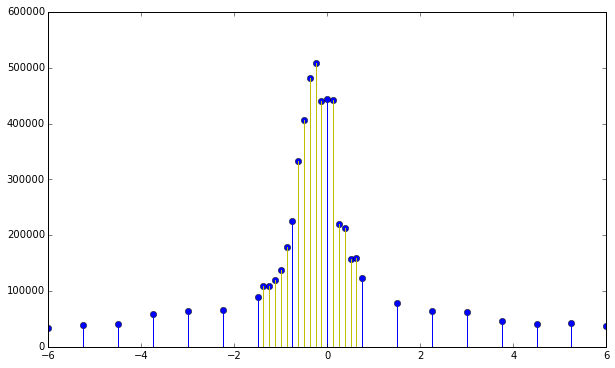

##############################ramayana.tif
(5175, 3107)-> (2588, 1554)-> (1294, 777)
[-1.375 -1.25  -1.125 -1.    -0.875 -0.625 -0.5   -0.375 -0.25  -0.125
  0.125  0.25   0.375  0.5    0.625]
* 0.0 1965236.0
  -0.375 1257280.0


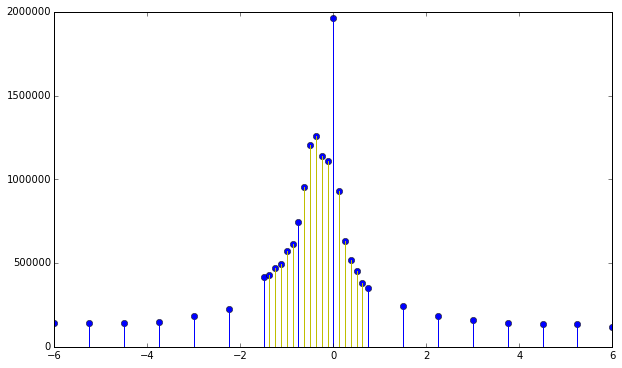

##############################vikata.tif


ValueError: total size of new array must be unchanged

In [19]:
direc = "/d/ocr/library/"
for f in os.listdir(direc):
    if ".tif" in f:
        print("#" * 30 + f)
        find_skew(direc+f)